# Лабораторная работа №1 «Численное решение дифференциальных уравнений»



## Вступление

В первой лабораторной Вашей задачей будет изучить и реализовать различные методы для численного решения дифференциальных уравнений.

Наверное, из курса физики Вы успели заметить, что дифференциальные уравнения появляются при описании явлений современного мира практически повсеместно, и практически никогда эти уравнения невозможно разрешить даже в квадратурах (выразив $y(x)$ через элементарные функции и интегралы от них).

Однако, физическими задачами уже никого не удивить, а уравнение движения маятника Вам уже, наверное, набило оскомину. Да и складывающееся ощущение, что дифференциальные уравнения возникают только лишь в задачах естествознания, ошибочно. Чтобы показать это, в качестве задачи в данной лабораторной работе рассматривается интересный пример использования дифференциальных уравнений в задачах искусственного интеллекта. *Неожиданно?!* Давайте разбираться.

## Задание 1. Численное решение дифференциального уравнения первого порядка.

Прежде чем приступить к интеллекту искусственному, применим интеллект естественный для реализации функций численного решения дифференциальных уравнений.


### Описание задачи

Так как дальше нам понадобится решать систему уравнений, то сразу будем решать задачу Коши
$$
\begin{cases} x(t)' = f(t, x(t)),\\ x(t_0) = x_0 \end{cases} \quad \text{где } x,x_0 \in \mathbb{R}^n, \ t \in [t_0,T].
$$

Рассмотрим два, наверное, самых распространенных метода:
- Метод ломаных Эйлера,
- Метод Рунге—Кутты.

Импортируем необходимые нам далее библиотеки.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#### Метод ломаных Эйлера

Метод Эйлера — это канонический и, честно говоря, простейший численный метод для решения дифференциальных уравнений. Мы будем искать приближение решения в виде ломаной. Для того, чтобы построить ломаную, нужно найти координаты ее вершин, этим и займемся.



##### Теоретические выкладки

Зададим на отрезке $[t_0, T]$ некоторое разбиение $\big\{t_m\big\}_{m=0}^M$.

Пусть $\varphi(t)$ — истинное решение. Разложим функцию$^*$ $\varphi(t)$ по Тейлору в точке $t_k ,\;  k \in \{0,1,\dots,M-1\}$:
$$
\varphi(t) = \varphi(t_k) + (t-t_k)\cdot \varphi'(t_k) + \mathrm{\overline o}\left(t-t_k\right).
$$
Подставим $t=t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k)  + \mathrm{\overline o}\left(t_{k+1}-t_k \right).
$$
Обозначим $h_k = t_{k+1} - t_k$ и обрубим наше разложение, отбросив о-малое. Тогда
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot \varphi'(t_k)
$$
— приближенное значение $\varphi(t_{k+1})$, $\psi(t_0) = x_0$.

Так как $\varphi(t)$ — решение уравнения $x'=f(t,x)$, то $\varphi'(t) = f(t, \varphi(t))$, а значит
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot f(t_k, \varphi(t_k)).
$$
Так как $\psi(t_k)$ — приближенное значение $\varphi (t_k)$, то, с некоторой потерей точности, в правой части можем заменить все $\varphi(t_k)$ на $\psi(t_k)$.

Тогда получаем множество упорядоченных вершин ломаной Эйлера:
$$\boxed{\psi(t_{k+1}) = \psi(t_k) + h_k \cdot f(t_k, \psi(t_k)), \quad \psi(t_0) = x_0}$$

Тогда для построения приближенного решения задачи Коши достаточно запустить вычисление вплоть до $\psi(t_M)$.

Более подробно, а именно: то, почему метод сходится, какая погрешность получается и т.д., обсуждалось на практических занятиях.

<sub>* В случае, когда у нас система уравнений, то есть $x$ является вектором, просто проделываем данные рассуждения  покомпонентно.</sub>

##### Реализация метода

Реализуйте метод ломаных Эйлера для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Euler_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

In [50]:
import numpy as np

def Euler_method(fun, t_span, x0, dt, args={}):
    """
    Решает задачу Коши для x' = fun(t, x, **args) методом Эйлера.

    Параметры:
    fun -- функция правой части ОДУ
    t_span -- кортеж (t0, t_max), задающий интервал времени
    x0 -- начальное условие (numpy.array)
    dt -- шаг по времени (float)
    args -- дополнительные аргументы для передачи в fun

    Возвращает:
    t_values -- массив временных точек
    x_values -- массив решений в каждый момент времени
    """
    t0, t_max = t_span
    t_values = np.arange(t0, t_max + dt, dt)
    n_steps = len(t_values)
    x_values = np.zeros((n_steps, len(x0)))
    x_values[0] = x0

    for k in range(n_steps - 1):
        t_k = t_values[k]
        x_k = x_values[k]
        f_k = fun(t_k, x_k, **args)
        x_values[k + 1] = x_k + dt * f_k

    return t_values, x_values



#### Метод Рунге-Кутты

Теперь рассмотрим не столько геометрически понятный, но достаточно часто применяемый на практике метод Рунге—Кутты, ограничившись лишь вторым порядком последнего.

##### Теоретические выкладки

Так как $\varphi$ — решение исходной задачи Коши, то $\varphi'(t) = f(t, \varphi(t))$, а также
$$
\varphi''(t) = \frac{d}{d t} f(t, \varphi(t)) = \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} \frac{d\varphi(t)}{dt}= \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} f(t,\varphi(t)).
$$

Аналогично тому, что делали ранее, воспользуемся разложением Тейлора на отрезке в точке $t_k$ и подставим точку $t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \varphi''(t_k) + \mathrm{\overline o}\left((t_{k+1}-t_k)^2\right).
$$
Отбросим слагаемое с о-малым, тем самым переходя к приближению $\psi$ функции $\varphi$; подставим выражения для $\varphi'$, $\varphi''$. Получим
$$
\psi(t_{k+1}) = \psi(t_k) + (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \left.\left(f'_t(t, \psi) + f'_\psi(t, \psi) f(t,\psi(t))\right)\right|_{(t_k, \psi(t_k))}. \tag{o}
$$

Запишем теперь разложение Тейлора функции двух переменных $f(t,\psi)$ в точке $(t_k, \psi(t_k))$ и подставим точку $\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big)$, где $\alpha > 0$ --- параметр метода,
$$
f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big) \approx f(t_k, \psi(t_k)) + \alpha(t_{k+1}-t_k)f'_t(t_k, \psi(t_k)) + \alpha(t_{k+1} - t_k)  f(t_k, \psi(t_k))f'_\psi(t_k, \psi(t_k)).
$$

Заметим, что это очень похоже на правую часть в выражении (o). Тогда, домножив на $\frac{1}{2\alpha} (t_{k+1}-t_k)$, получим
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2\alpha}(t_{k+1} - t_k) f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big).
$$

Или, вводя обозначение длины шага $h_k = t_{k+1} - t_k$, получаем итерационную схему для метода Рунге—Кутты 2-ого порядка
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) h_k \cdot \underbrace{f(t_k, \psi(t_k))}_{k_1} + \frac{1}{2\alpha} h_k \cdot  \underbrace{f\big(t_{k}+\alpha h_k, \psi(t_{k})+ \alpha h_k f(t_k, \psi(t_k))\big)}_{k_2},
$$
Переобозначив под более принятые обозначения, получим
$$
\boxed{
    \begin{split}
        &\psi(t_{k+1}) = \psi(t_k) + b_1 h_k k_1 + b_2 h_k k_2,\\
        & k_1 = f(t_k, \psi(t_k)), \quad k_2 = f\big(t_{k}+a_{21} h_k, \psi(t_{k})+ a_{21} h_k f(t_k, \psi(t_k))\big),\\
        & b_1, b_2 \geqslant 0, \quad b_1 + b_2 = 1, \quad a_{21} = \frac{1}{b_2}.
    \end{split}
}
$$


##### Реализация метода

Реализуйте метод Рунге-Кутты для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Runge_Kutta_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

В зависимости от Вашего номера в таблице, возьмите $b_2 = \frac{1}{6}$

In [13]:
'''
Реализация метода Рунге—Кутты в функции Runge_Kutta_method
'''


def Runge_Kutta_method(fun, t, x_0, dt, args={}):
    # Инициализация параметров разбиения
    t0, T = t
    t_values = np.arange(t0, T + dt, dt)  # Генерация массива точек времени (включаем T)
    n_steps = len(t_values)  # Количество шагов
    n_vars = len(x_0)  # Количество переменных в начальном условии
    x_values = np.zeros((n_steps, n_vars))  # Массив для хранения значений решения
    x_values[0] = x_0  # Установка начального условия

    # Определение параметров метода Рунге-Кутты
    b2 = 1 / 6  # Заданное значение для b2 = 1/(29mod(8)+1)
    b1 = 1 - b2
    a21 = 1 / b2

    # Основной цикл метода Рунге-Кутты второго порядка
    for k in range(n_steps - 1):
        t_k = t_values[k]  # Текущее время
        x_k = x_values[k]  # Текущее значение функции
        h_k = dt  # Шаг интегрирования

        # Вычисление промежуточных коэффициентов k1 и k2
        k1 = fun(t_k, x_k, **args)
        k2 = fun(t_k + a21 * h_k, x_k + a21 * h_k * k1, **args)

        # Вычисление следующего значения функции
        x_values[k + 1] = x_k + b1 * h_k * k1 + b2 * h_k * k2

    return t_values, x_values




#### Примеры

Давайте проверим Вашу реализацию на примерах.

###### 1. Оба метода справляются неплохо

Придумайте пример дифференциального уравнения Бернулли c $\alpha = 2$, для которого Вы можете найти точное решение в явном виде и предложенные методы дают хорошие результаты. Также придумайте некоторые начальные условия и отрезок, на котором ищется решение.

Решите задачу аналитическим (это Вам придется сделать честным способом на бумажке)

https://drive.google.com/file/d/1QBPHUa65jHDoprR7jzy4fXRLJadrZBa_/view?usp=sharing

In [7]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''
def f(t, x):
    return t * x**2 - x


In [8]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''
def phi(t):
    return 1 / (t + 1)

Проведите **анализ** относительно связи величины шага $h$, метода и получившейся ошибки.

> Ваше исследование должно содержать как минимум:
- сравнение ошибок для метода Эйлера с разными значениями шага ($\geqslant 3$),
- сравнение ошибок для метода Рунге-Кутты с разными значениями шага ($\geqslant 3$),
- сравнение методов Эйлера и Рунге-Кутты между собой:
    - разница в ошибках при одинаковых шагах
    - разница в шагах при (приблизительно) одинаковой ошибке


❗ **Место для Вашего решения** ❗

Text(0.5, 1.0, 'Зависимость ошибки')

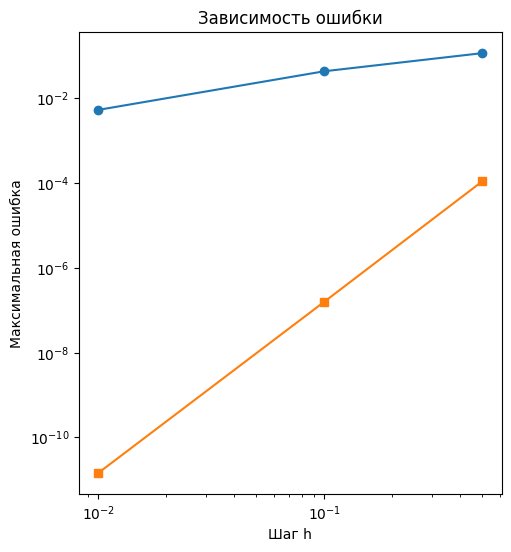

In [19]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
z
'''
# Import the 'time' module
import time
import numpy as np
import matplotlib.pyplot as plt

# Assuming euler_method and rk4_method are defined elsewhere
# For demonstration, I'll include simple implementations:

def euler_method(f, x0, y0, x_end, h):
  x_values = [x0]
  y_values = [y0]
  x = x0
  y = y0
  while x < x_end:
    y = y + h * f(x, y)
    x = x + h
    x_values.append(x)
    y_values.append(y)
  return x_values, y_values

def rk4_method(f, x0, y0, x_end, h):
  x_values = [x0]
  y_values = [y0]
  x = x0
  y = y0
  while x < x_end:
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    x = x + h
    x_values.append(x)
    y_values.append(y)
  return x_values, y_values

# Задаём правую часть уравнения
def f(x, y):
    return x * y**2 - y

# Аналитическое решение
def phi(x):
    return 1 / (x + 1)

# Начальные условия
x0 = 1
y0 = 0.5
x_end = 5

# Значения шага h
h_values = [0.5, 0.1, 0.01]

# Для хранения результатов
errors_euler = []
errors_rk4 = []
times_euler = []
times_rk4 = []

# Метод Эйлера
for h in h_values:
    start_time = time.time()
    x_euler, y_euler = euler_method(f, x0, y0, x_end, h)
    elapsed_time = time.time() - start_time
    times_euler.append(elapsed_time)
    y_true = [phi(x) for x in x_euler]
    error = max(abs(np.array(y_true) - np.array(y_euler)))
    errors_euler.append(error)

# Метод Рунге-Кутты
for h in h_values:
    start_time = time.time()
    x_rk4, y_rk4 = rk4_method(f, x0, y0, x_end, h)
    elapsed_time = time.time() - start_time
    times_rk4.append(elapsed_time)
    y_true = [phi(x) for x in x_rk4]
    error = max(abs(np.array(y_true) - np.array(y_rk4)))
    errors_rk4.append(error)

# Построение графиков
plt.figure(figsize=(12, 6))

# График ошибок метода Эйлера
plt.subplot(1, 2, 1)
plt.loglog(h_values, errors_euler, marker='o', label='Метод Эйлера')
plt.loglog(h_values, errors_rk4, marker='s', label='Метод Рунге-Кутты 4-го порядка')
plt.xlabel('Шаг h')
plt.ylabel('Максимальная ошибка')
plt.title('Зависимость ошибки')


Сделайте вывод относительно связи между размером шага, точностью и временем работы программы.

---
 ❗ **Место для Вашего вывода** ❗

 Мне кажется, что для практических задач, где важна точность и эффективность, предпочтительно использовать методы более высокого порядка, такие как метод Рунге-Кутты 4-го порядка, поскольку они обеспечивают высокую точность при относительно больших шагах и, следовательно, сокращают общее время вычислений.

Метод Рунге-Кутты 4-го порядка позволяет использовать большие шаги для достижения заданной точности, что может сократить время вычислений в задачах с большими объёмами данных.

Метод Эйлера прост в реализации, но требует очень маленьких шагов для достижения высокой точности, что может приводить к увеличению времени выполнения программы.

При выборе метода и шага необходимо балансировать между требуемой точностью и допустимым временем вычисления.

---

## 2. Метод Эйлера справляется, но лишь сильное уменьшение шага дает адекватную точность. Метод Рунге-Кутты справляется хорошо

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого точности метода Эйлера может не хватить, а метод Рунге-Кутты выручает.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

https://drive.google.com/file/d/1hCLlA2urRjDlyNGQREfYXQfjXIAmQ9oE/view?usp=sharing

In [20]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t,x):
   return -15 * y + 15 * np.sin(x) + np.cos(x)


In [21]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    return np.sin(x)


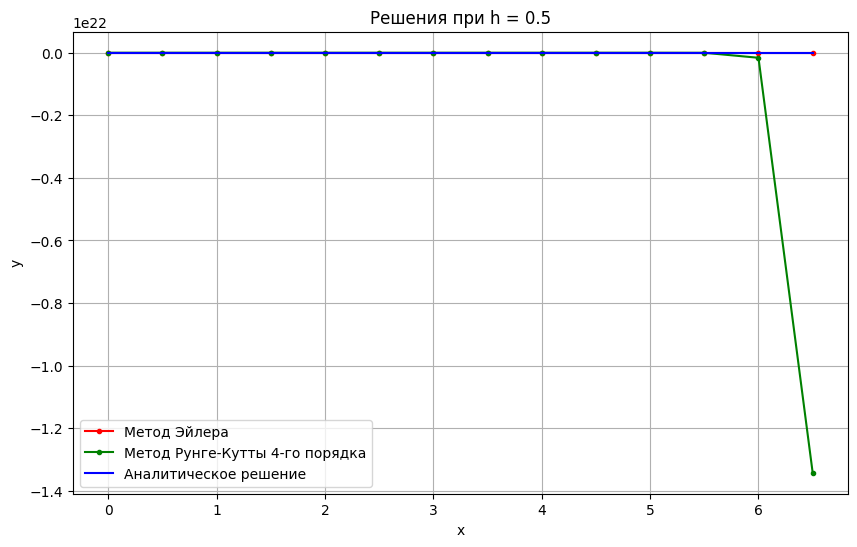

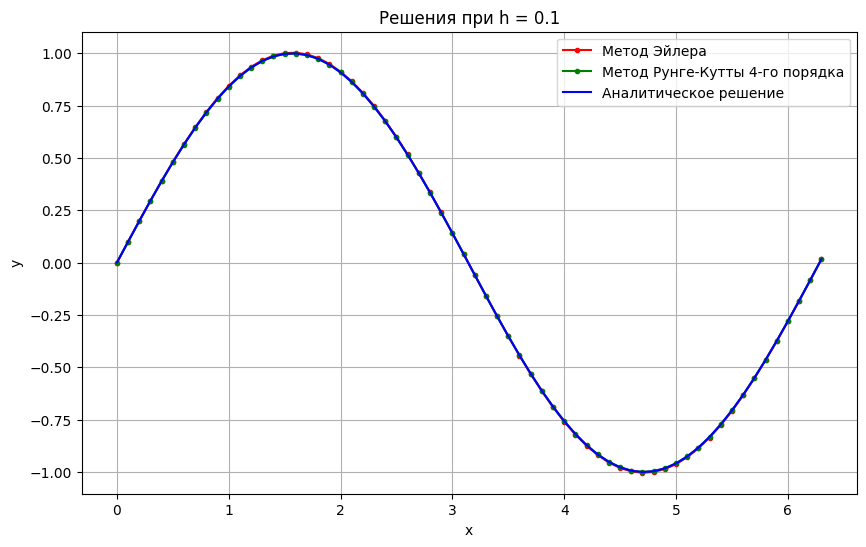

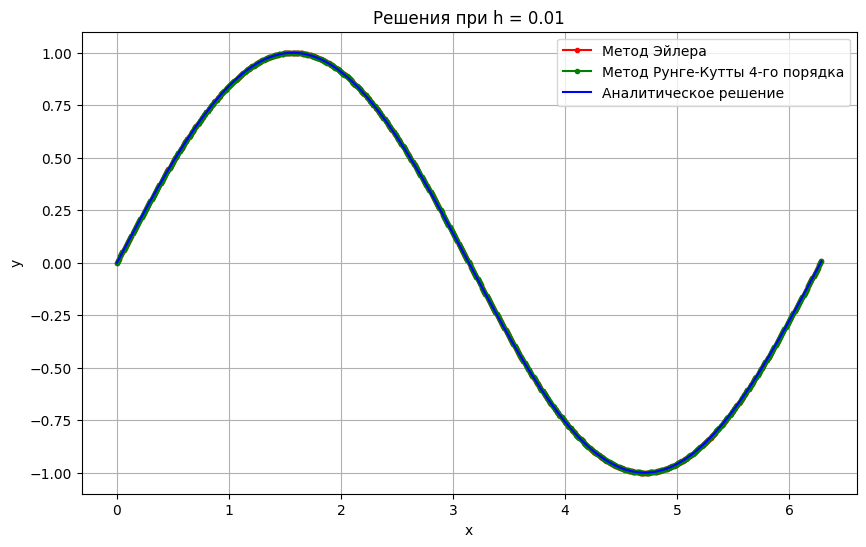

Метод Эйлера:
h = 0.5, Максимальная ошибка = 62974368.26929, Время выполнения = 0.00010 сек
h = 0.1, Максимальная ошибка = 0.00334, Время выполнения = 0.00026 сек
h = 0.01, Максимальная ошибка = 0.00033, Время выполнения = 0.00173 сек

Метод Рунге-Кутты 4-го порядка:
h = 0.5, Максимальная ошибка = 13423783964199390019584.00000, Время выполнения = 0.00014 сек
h = 0.1, Максимальная ошибка = 0.00048, Время выполнения = 0.00067 сек
h = 0.01, Максимальная ошибка = 0.00000, Время выполнения = 0.00863 сек


In [22]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''


# Задаём правую часть уравнения
def f(x, y):
    return -15 * y + 15 * np.sin(x) + np.cos(x)

# Аналитическое решение
def phi(x):
    return np.sin(x)

# Начальные условия
x0 = 0
y0 = 0
x_end = 2 * np.pi  # Решаем на интервале от 0 до 2π

# Значения шага h
h_values = [0.5, 0.1, 0.01]

# Метод Эйлера
def euler_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        y += h * f(x, y)
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

# Метод Рунге-Кутты 4-го порядка
def rk4_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

# Списки для хранения ошибок и времени
errors_euler = []
errors_rk4 = []
times_euler = []
times_rk4 = []

for h in h_values:
    # Метод Эйлера
    start_time = time.time()
    x_euler, y_euler = euler_method(f, x0, y0, x_end, h)
    elapsed_time = time.time() - start_time
    times_euler.append(elapsed_time)
    y_true = phi(np.array(x_euler))
    error = max(abs(y_true - np.array(y_euler)))
    errors_euler.append(error)

    # Метод Рунге-Кутты
    start_time = time.time()
    x_rk4, y_rk4 = rk4_method(f, x0, y0, x_end, h)
    elapsed_time = time.time() - start_time
    times_rk4.append(elapsed_time)
    y_true = phi(np.array(x_rk4))
    error = max(abs(y_true - np.array(y_rk4)))
    errors_rk4.append(error)

    # Построение графиков
    plt.figure(figsize=(10, 6))
    plt.plot(x_euler, y_euler, 'r.-', label='Метод Эйлера')
    plt.plot(x_rk4, y_rk4, 'g.-', label='Метод Рунге-Кутты 4-го порядка')
    plt.plot(x_euler, y_true, 'b-', label='Аналитическое решение')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Решения при h = {h}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Вывод результатов
print("Метод Эйлера:")
for i, h in enumerate(h_values):
    print(f"h = {h}, Максимальная ошибка = {errors_euler[i]:.5f}, Время выполнения = {times_euler[i]:.5f} сек")

print("\nМетод Рунге-Кутты 4-го порядка:")
for i, h in enumerate(h_values):
    print(f"h = {h}, Максимальная ошибка = {errors_rk4[i]:.5f}, Время выполнения = {times_rk4[i]:.5f} сек")




Сделайте вывод относительно причин, по которым получается такое поведение методов.

Выводы:
Мне кажется, что основными причинами различий в поведении методов являются их порядки точности и способности учитывать изменения решения внутри шага интегрирования. Метод Эйлера, будучи простым и быстрым, недостаточно точен для уравнений с быстро меняющимися решениями или жёстких уравнений. Его низкий порядок точности и высокая чувствительность к величине шага делают его непрактичным для таких задач.

Метод Рунге-Кутты 4-го порядка, напротив, обеспечивает высокую точность благодаря учёту изменений производной внутри каждого шага. Он позволяет использовать более крупные шаги
h
h без существенной потери точности, что сокращает количество вычислений и время выполнения программы. Это делает его предпочтительным выбором для задач, требующих высокой точности и эффективности, особенно когда решение содержит быстро меняющиеся компоненты или жёсткие характеристики.



## 3. Оба этих метода не справляются с задачей

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого ни метод Эйлера, ни метод Рунге-Кутты не может получить хорошего результата.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

❗ **Место для Вашего решения** ❗

In [23]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t,x):
     return y**2


In [24]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    return 1 / (1 - x)


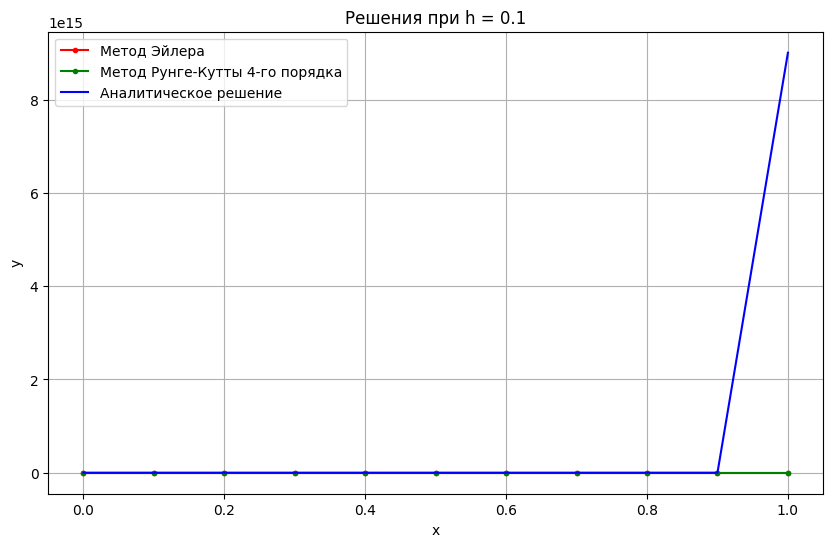

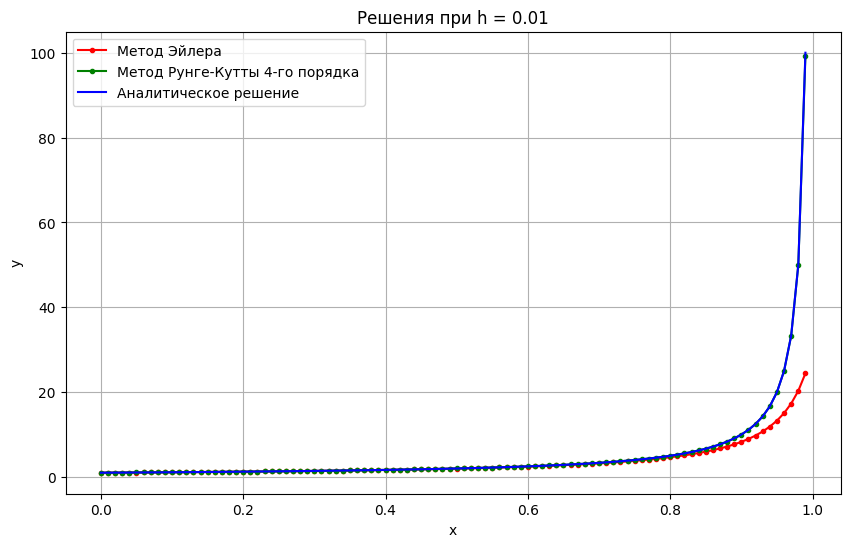

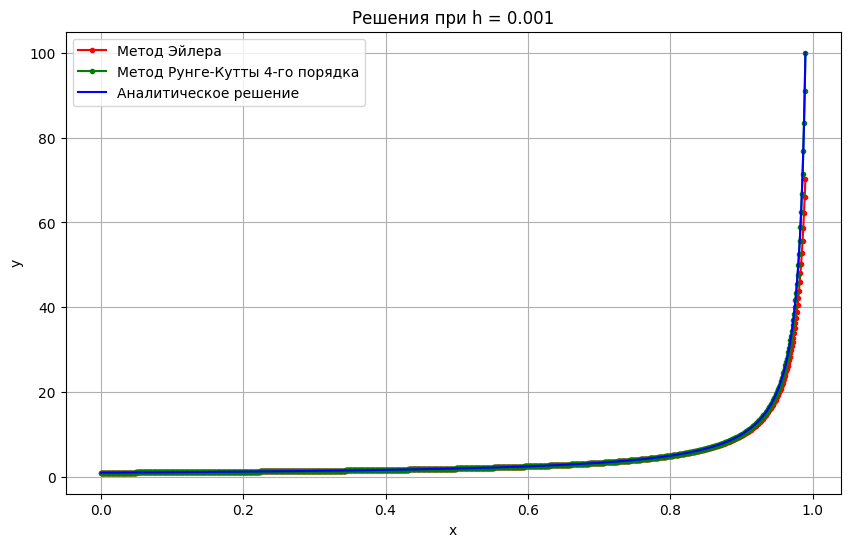

Метод Эйлера:
h = 0.1, Максимальная ошибка = 9007199254740986.00000, Время выполнения = 0.00001 сек
h = 0.01, Максимальная ошибка = 75.57577, Время выполнения = 0.00006 сек
h = 0.001, Максимальная ошибка = 29.67641, Время выполнения = 0.00044 сек

Метод Рунге-Кутты 4-го порядка:
h = 0.1, Максимальная ошибка = 9007199254740910.00000, Время выполнения = 0.00002 сек
h = 0.01, Максимальная ошибка = 0.71009, Время выполнения = 0.00015 сек
h = 0.001, Максимальная ошибка = 0.00014, Время выполнения = 0.00231 сек


In [25]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

# Задаём правую часть уравнения
def f(x, y):
    return y**2

# Аналитическое решение
def phi(x):
    return 1 / (1 - x)

# Начальные условия
x0 = 0
y0 = 1
x_end = 0.99  # Берём x_end близким к 1, но меньше, чтобы избежать сингулярности

# Значения шага h
h_values = [0.1, 0.01, 0.001]

# Метод Эйлера
def euler_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        y += h * f(x, y)
        x += h
        x_values.append(x)
        y_values.append(y)
        if y > 1e6:  # Ограничиваем значение y для избежания переполнения
            break
    return x_values, y_values

# Метод Рунге-Кутты 4-го порядка
def rk4_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
        if y > 1e6:  # Ограничиваем значение y для избежания переполнения
            break
    return x_values, y_values

# Списки для хранения ошибок и времени
errors_euler = []
errors_rk4 = []
times_euler = []
times_rk4 = []

for h in h_values:
    # Метод Эйлера
    start_time = time.time()
    x_euler, y_euler = euler_method(f, x0, y0, x_end, h)
    elapsed_time = time.time() - start_time
    times_euler.append(elapsed_time)
    y_true = phi(np.array(x_euler))
    error = max(abs(y_true - np.array(y_euler)))
    errors_euler.append(error)

    # Метод Рунге-Кутты
    start_time = time.time()
    x_rk4, y_rk4 = rk4_method(f, x0, y0, x_end, h)
    elapsed_time = time.time() - start_time
    times_rk4.append(elapsed_time)
    y_true_rk4 = phi(np.array(x_rk4))
    error_rk4 = max(abs(y_true_rk4 - np.array(y_rk4)))
    errors_rk4.append(error_rk4)

    # Построение графиков
    plt.figure(figsize=(10, 6))
    plt.plot(x_euler, y_euler, 'r.-', label='Метод Эйлера')
    plt.plot(x_rk4, y_rk4, 'g.-', label='Метод Рунге-Кутты 4-го порядка')
    plt.plot(x_euler, phi(np.array(x_euler)), 'b-', label='Аналитическое решение')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Решения при h = {h}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Вывод результатов
print("Метод Эйлера:")
for i, h in enumerate(h_values):
    print(f"h = {h}, Максимальная ошибка = {errors_euler[i]:.5f}, Время выполнения = {times_euler[i]:.5f} сек")

print("\nМетод Рунге-Кутты 4-го порядка:")
for i, h in enumerate(h_values):
    print(f"h = {h}, Максимальная ошибка = {errors_rk4[i]:.5f}, Время выполнения = {times_rk4[i]:.5f} сек")




Сделайте вывод относительно причин неприменимости этих методов.


Мне кажется, что основными причинами неприменимости методов Эйлера и Рунге-Кутты для решения уравнения являются особенности самого уравнения и его аналитического решения, а именно наличие сингулярности при конечном значении x. Методы предполагают гладкость решения: И метод Эйлера, и метод Рунге-Кутты 4-го порядка основаны на предположении, что решение и его производная изменяются плавно на рассматриваемом интервале. Наличие сингулярности нарушает это предположение.


## 4. Применимость методов для задачи с особым решением

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого существует особое решение.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

https://drive.google.com/file/d/1hXjs-HF44RXry07YKGv5oUJL1KZIx1q3/view?usp=sharing

❗ **Место для Вашего решения** ❗

In [29]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''
import numpy as np
def f(t, x):  # Change the arguments to t and x to match the function definition
    discriminant = x**2 + 4 * t  # Use t instead of y
    if discriminant < 0:
        # Комплексные значения, вернём NaN
        return float('nan')
    else:
        return (-x + np.sqrt(discriminant)) / 2

In [27]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi_general(x):
    return -0.5 * x + 0.25

def phi_singular(x):
    return -0.25 * x**2


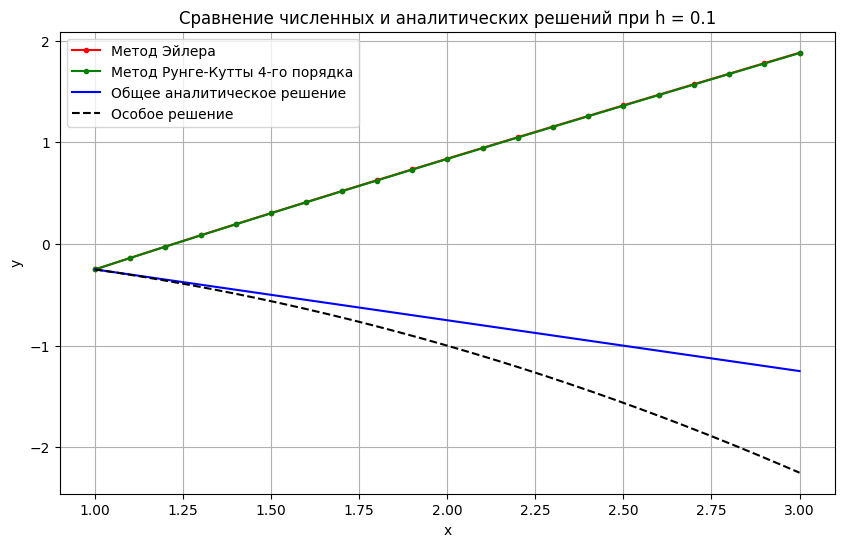

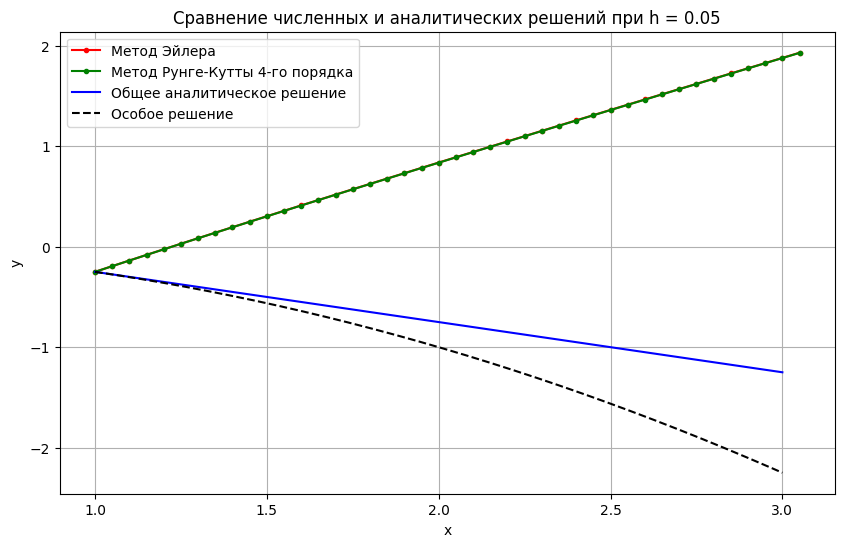

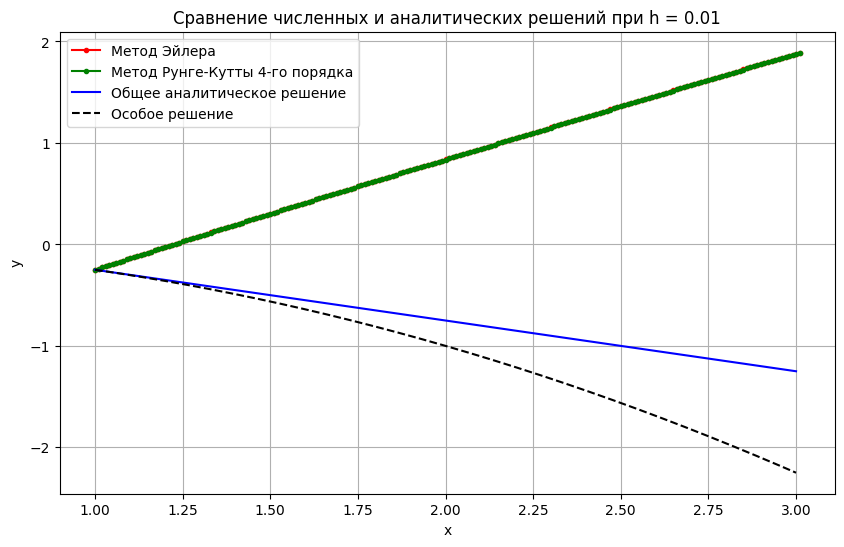

In [30]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''


# Функция f(x, y) задана выше

# Метод Эйлера
def euler_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        y_derivative = f(x, y)
        if np.isnan(y_derivative):
            break
        y += h * y_derivative
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

# Метод Рунге-Кутты 4-го порядка
def rk4_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        if np.isnan(k1) or np.isnan(k2) or np.isnan(k3) or np.isnan(k4):
            break
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values
# Начальные условия
x0 = 1
y0 = -0.25
x_end = 3
h_values = [0.1, 0.05, 0.01]

for h in h_values:
    # Метод Эйлера
    x_euler, y_euler = euler_method(f, x0, y0, x_end, h)

    # Метод Рунге-Кутты 4-го порядка
    x_rk4, y_rk4 = rk4_method(f, x0, y0, x_end, h)

    # Аналитические решения
    x_analytic = np.linspace(x0, x_end, 1000)
    y_general = phi_general(x_analytic)
    y_singular = phi_singular(x_analytic)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(x_euler, y_euler, 'r.-', label='Метод Эйлера')
    plt.plot(x_rk4, y_rk4, 'g.-', label='Метод Рунге-Кутты 4-го порядка')
    plt.plot(x_analytic, y_general, 'b-', label='Общее аналитическое решение')
    plt.plot(x_analytic, y_singular, 'k--', label='Особое решение')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Сравнение численных и аналитических решений при h = {h}')
    plt.legend()
    plt.grid(True)
    plt.show()




Сделайте вывод относительно произошедшего в моделировании и применимости этих методов к задачам с особым решением.

Мне кажется, что численные методы, такие как метод Эйлера и метод Рунге-Кутты 4-го порядка, при моделировании дифференциальных уравнений с особым решением не способны выявить это особое решение, если начальные условия и вычисления направляют их по траектории общего решения. Это связано с тем, что численные методы основаны на локальной аппроксимации производной и не учитывают глобальные особенности уравнения, такие как наличие особых решений. Для корректного моделирования таких уравнений необходимо применять специальные методы или проводить дополнительный аналитический анализ, чтобы определить все возможные решения и их области применимости.

#### \* Дополнительное размышление (Дополнительное задание _по желанию_)

Посмотрите, какие методы могут использоваться для исправления выявленных недостатков приведенных выше методов.

- Опишите кратко теоретические выкладки относительно одного из таких методов.
- Попробуйте объяснить, каким образом предложенный метод помогает бороться с различными недостатками.
- Опишите проблемы, которые появляются (или также проявляются) по сравнению с стандартными методами (Эйлера и Рунге-Кутты).
- Приведите пример, в котором методы Эйлера и Рунге-Кутты не решают задачу, а предложенный в этом пункте метод справляется.

## Задание 2. Восстановление цифр по бракованным картинкам.

В этом пункте мы посмотрим на неожи

### Описание задачи

Вам предоставлен кусок тренировочной выборки из базы данных [MNIST](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). А также бракованные изображения из этого же датасета.

<p>    
    <center>
    <img src="https://drive.google.com/uc?export=view&id=1jgWvIHwXkhQ1iE6ER0Wy_SLxBvCWW1Dd" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <img src="https://drive.google.com/uc?export=view&id=1AET7slaGnEePLx3qjrxycJSXfHJg55bz" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <em><br>Пример данных из датасета MNIST<br>Сначала: тренировочные изображения,<br>Потом: бракованные изображения</em>
    </center>
</p>

Необходимо, используя простейшую версию [нейронной сети Хопфилда](https://arxiv.org/abs/2008.02217), восстановить цифры на бракованных изображениях.

<p>    
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/Hopfield%27s_net.png" alt>
    <em><br>Пример: схема нейронной сети Хопфилда с тремя нейронами</em>
    </center>
</p>

Переписывая заданную в нейронной сети Хопфилда структуру с $m$ нейронами в виде уравнения в матричном виде, можно получить
$$\boxed{x' = A^T \mathrm{softmax}(\beta Ax) - x}, \tag{1}$$
где $A$ — $\text{матрица}_{(m \times n)}$ весов, $\beta \in \mathbb{R}$, $x$ — $\text{вектор}_{(n, 1)}$ входных нейронов, $\mathrm{softmax}(z)_i = \frac{e^{z_i}}{\sum_{k} e^{z_k}}$ — функция активации.

А значит, задача применения нейронной сети с известной$^*$ матрицей весов сводится к решению дифференциального уравнения (1).

<sub>$^*$ Матрица с весами нетрудно получается на
основе тренировочных данных, о чем мы поговорим чуть дальше.</sub>

Нам дальше понадобится функция $\mathrm{softmax}(x)$. Реализуйте более удобную далее в применении $\mathrm{softmax}(\beta \cdot x)$ в функции `softmax(x, beta)`, рассматривая $x$ как массив `numpy.array`, а $\beta$ — как число.

In [6]:


def softmax(z, beta=1):
    z_beta = beta * z
    exp_z = np.exp(z_beta - np.max(z_beta))
    return exp_z / np.sum(exp_z)


Запишите правую часть уравнения (1), с которым мы дальше будем активно работать, в функцию `dynamics(x, A, beta)`. Используйте в качестве $x$ и $A$ массивы `numpy.array`, а в качестве $\beta$ — число.

In [3]:

def dynamics(x, A, beta):
    Ax = np.dot(A, x)
    softmax_result = softmax(Ax, beta)
    x_prime = np.dot(A.T, softmax_result) - x
    return x_prime

### Интуитивное понимание принципа работы нейронной сети Хопфилда


#### Простой случай на плоскости

Для того, чтобы понять, почему предложенный выше метод работает, необходимо углубиться в дифференциальное уравнение (1).

Как мы помним, для начального анализа мы можем использовать некоторые графические методы. Например, изоклины, или, в более общем случае, --- векторные поля.

Постройте с помощью [`plt.quiver`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) векторное поле для уравнения $x' = A^T \mathrm{softmax} (\beta A x)-x$, положив $A = \begin{bmatrix}1&0\\0&1\\-1&-1\end{bmatrix}$, $\beta=5$.

Добавьте на этот же график точки* $(1,0), (0,1), (-1,-1)$.

_* Заметьте, что это просто точки из матрицы $A$, координаты которых находятся в строках этой матрицы_.

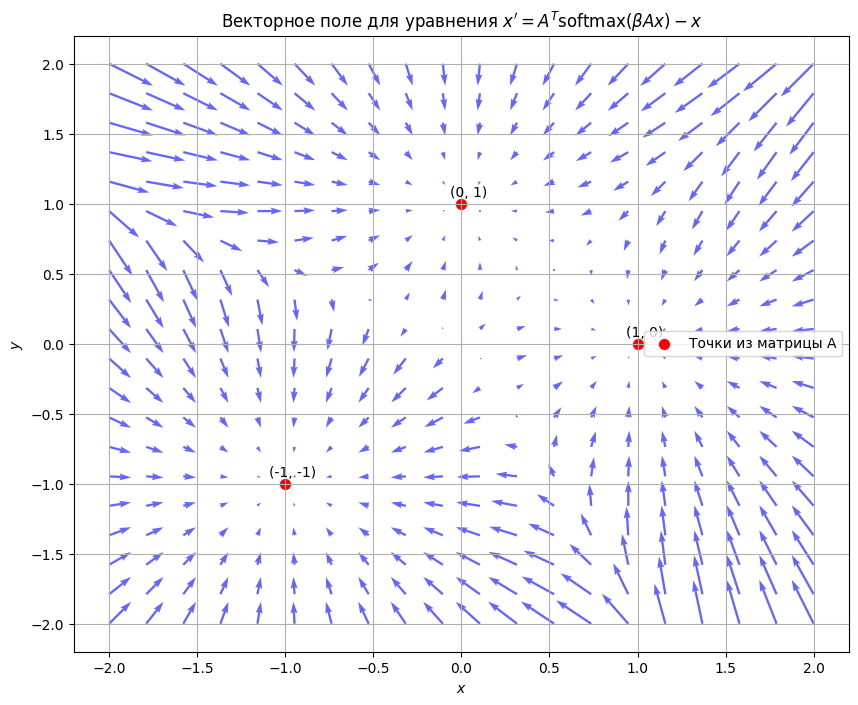

In [31]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
'''

# Параметры
A = np.array([[1, 0],
              [0, 1],
              [-1, -1]])
beta = 5

# Создаем сетку точек в области [-2, 2] x [-2, 2]
x_values = np.linspace(-2, 2, 20)
y_values = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_values, y_values)

# Инициализируем массивы для компонентов векторов
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Вычисляем векторное поле
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_point = np.array([X[i, j], Y[i, j]])
        x_dot = dynamics(x_point, A, beta)
        U[i, j] = x_dot[0]
        V[i, j] = x_dot[1]
plt.figure(figsize=(10, 8))

# Отображаем векторное поле
plt.quiver(X, Y, U, V, color='blue', alpha=0.6)

# Добавляем точки из матрицы A
points = np.array([[1, 0], [0, 1], [-1, -1]])
plt.scatter(points[:, 0], points[:, 1], color='red', s=50, label='Точки из матрицы A')

# Подписываем точки
for idx, (x_pt, y_pt) in enumerate(points):
    plt.annotate(f'({x_pt}, {y_pt})', (x_pt, y_pt), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Векторное поле для уравнения $x\' = A^T \\mathrm{softmax}(\\beta A x) - x$')
plt.legend()
plt.grid(True)
plt.show()


Замечаете странное поведение стрелочек? Они как будто смотрят на одну из наших выбранных точек.

Давайте проверим, сохранится ли такое поведение при другой матрице $A$.

Рассмотрите матрицу $A=\begin{bmatrix}2&2\\2&-1\\-3&4\\-4&-3\end{bmatrix}$.

Постройте векторное поле и найдите, какие точки обладают таким же поведением (к ним тянутся стрелочки).


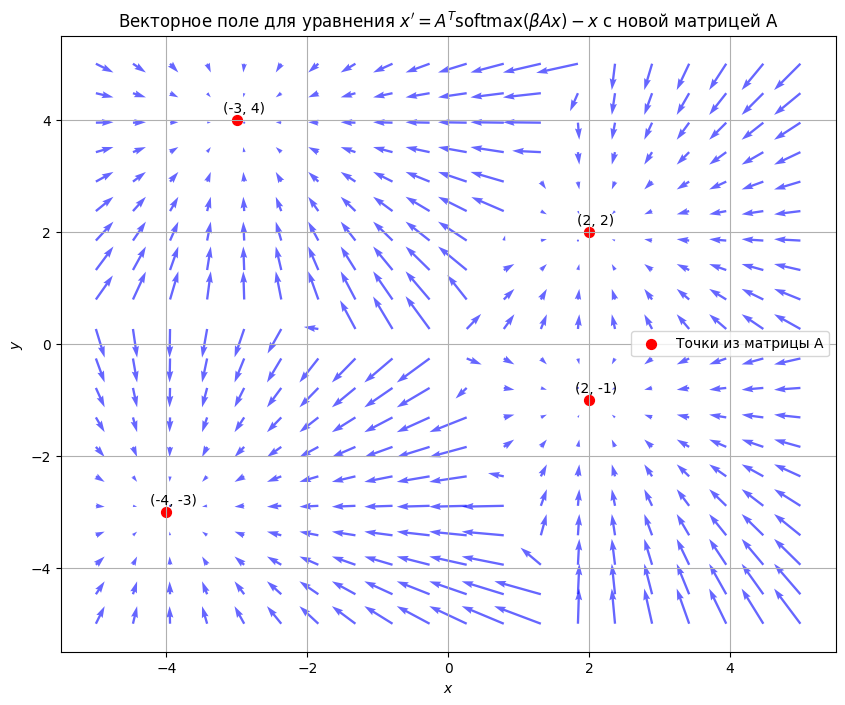

In [32]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
A = [[2,2],[2,-1],[-3,4],[-4,-3]]
beta = 5
'''

import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(z, beta=1):
    z_beta = beta * z
    exp_z = np.exp(z_beta - np.max(z_beta))
    return exp_z / np.sum(exp_z)

# Define the dynamics function
def dynamics(x, A, beta):
    Ax = np.dot(A, x)
    softmax_result = softmax(Ax, beta)
    x_prime = np.dot(A.T, softmax_result) - x
    return x_prime

# Parameters
A = np.array([[ 2,  2],
              [ 2, -1],
              [-3,  4],
              [-4, -3]])
beta = 5

# Create a grid of points in the range [-5, 5] x [-5, 5]
x_values = np.linspace(-5, 5, 20)
y_values = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_values, y_values)

# Initialize arrays for the vector components
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Compute the vector field
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_point = np.array([X[i, j], Y[i, j]])
        x_dot = dynamics(x_point, A, beta)
        U[i, j] = x_dot[0]
        V[i, j] = x_dot[1]

plt.figure(figsize=(10, 8))

# Display the vector field
plt.quiver(X, Y, U, V, color='blue', alpha=0.6)

# Add points from matrix A
points = A  # Using the rows of A as points
plt.scatter(points[:, 0], points[:, 1], color='red', s=50, label='Точки из матрицы A')

# Annotate the points
for idx, (x_pt, y_pt) in enumerate(points):
    plt.annotate(f'({x_pt}, {y_pt})', (x_pt, y_pt), textcoords="offset points", xytext=(5, 5), ha='center')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Векторное поле для уравнения $x\' = A^T \\mathrm{softmax}(\\beta A x) - x$ с новой матрицей A')
plt.legend()
plt.grid(True)
plt.show()



Не кажется ли это очень неплохим свойством? Вспомним, что векторное поле показывает как будто бы «направление скорости» нашей системы. А значит, начиная из какой-нибудь точки на плоскости, мы «скатимся» по стрелочкам в одну из заданных нами в матрице $A$ точек.

Подробнее о таком поведении мы поговорим ближе к концу семестра в курсе, а пока стоит понимать это именно на таком интуитивном уровне.


На самом деле, наша система (1) дает даже больше.

Давайте рассмотрим матрицу $A=\begin{bmatrix}2&3\\-3&2\\2&5\\-2&-3\\3&5\end{bmatrix}$. Видно, что несколько предполагаемых "точек притяжения" сгруппированы в первой четверти плоскости.

Постройте векторное поле для уравнения (1), используя данную матрицу, и посмотрите, как наше уравнение справляется с такими сгруппированными точками.

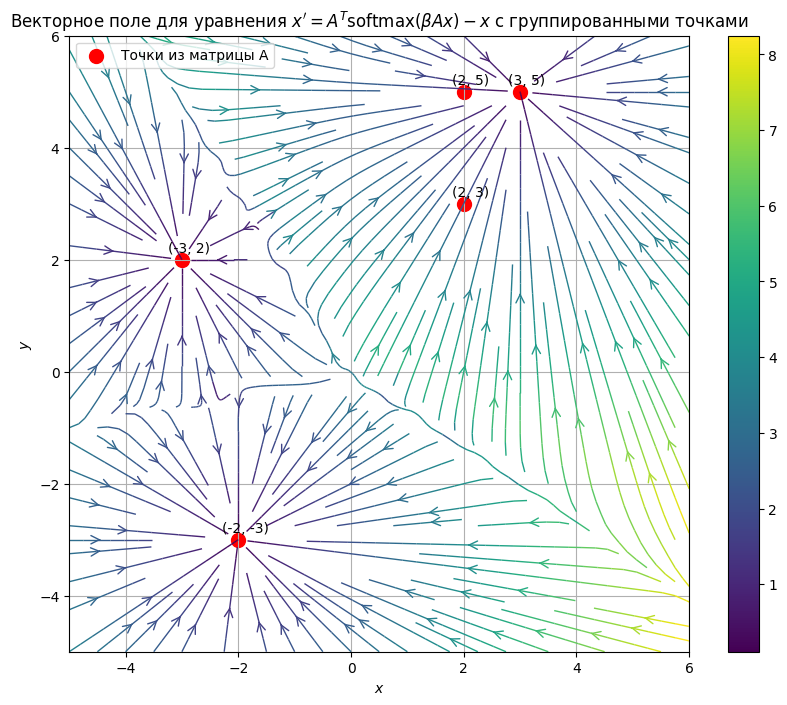

In [33]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
A = [[2,3],[-3,2],[2,5], [-2,-3],[3,5]]
beta = 5
'''

import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(z, beta=1):
    z_beta = beta * z
    exp_z = np.exp(z_beta - np.max(z_beta))
    return exp_z / np.sum(exp_z)

# Define the dynamics function
def dynamics(t, x, A, beta):
    Ax = np.dot(A, x)
    softmax_result = softmax(Ax, beta)
    x_prime = np.dot(A.T, softmax_result) - x
    return x_prime


# Parameters
A = np.array([[ 2,  3],
              [-3,  2],
              [ 2,  5],
              [-2, -3],
              [ 3,  5]])
beta = 5

# Create a grid of points in the range [-5, 6] x [-5, 6]
x_values = np.linspace(-5, 6, 30)
y_values = np.linspace(-5, 6, 30)
X, Y = np.meshgrid(x_values, y_values)

# Initialize arrays for the vector components
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Compute the vector field
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_point = np.array([X[i, j], Y[i, j]])
        x_dot = dynamics(x_point, A, beta)
        U[i, j] = x_dot[0]
        V[i, j] = x_dot[1]

plt.figure(figsize=(10, 8))

# Display the vector field using streamplot for smoother visualization
speed = np.sqrt(U**2 + V**2)
strm = plt.streamplot(X, Y, U, V, color=speed, linewidth=1, cmap='viridis', density=1.5, arrowstyle='->', arrowsize=1.5)

# Add points from matrix A
points = A  # Using the rows of A as points
plt.scatter(points[:, 0], points[:, 1], color='red', s=100, label='Точки из матрицы A')

# Annotate the points
for idx, (x_pt, y_pt) in enumerate(points):
    plt.annotate(f'({x_pt}, {y_pt})', (x_pt, y_pt), textcoords="offset points", xytext=(5, 5), ha='center')

plt.colorbar(strm.lines)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Векторное поле для уравнения $x\' = A^T \\mathrm{softmax}(\\beta A x) - x$ с группированными точками')
plt.legend()
plt.grid(True)
plt.show()



Замечательно! Оказывается, что среди этих сгруппированных точек выделяется одна, которая «притягивает сильнее».



Возможно, Вам до сих пор не очень понятно, к чему все эти рассуждения и как они помогут нам с обработкой изображения. Давайте переложим рассмотренные выше идеи на датасет `MNIST`.

#### Отношение к изображениям и цифрам

Вспомним, что картинка в компьютере представляется массивом размера `(height, width)`.

Теперь представьте, что мы рассматриваем распрямленную$^*$ картинку, то есть каждый пиксель записан на новой строчке. Получившийся вектор имеет размер `(width*height,1)`.

И этот вектор мы можем подставлять в наше уравнение (1). Решая это уравнение, получим какой-то вектор новой распрямленной картинки, который мы можем обратно привести к исходному размеру `(height, width)`.

<sub>* Заметьте, что мы не теряем информацию о картинке, если помним изначальные размеры, так как в любой момент можем обратно собрать изображение по распрямленному.</sub>

Остается лишь вопрос в матрице $A$. Какую ее брать?

И оказывается, что тут нам помогут наши «точки притяжения». Ведь если мы знаем на каком-то тренировочном наборе, как примерно выглядят цифры, то можем их положить в матрицу $A$. Таким образом, мы получим, что наши тренировочные картинки являются «точками притяжения» для бракованных. А значит любая бракованная, следуя по стрелочкам векторного поля$^*$, придет к одной из тренировочных картинок, тем самым восстановив цифру на изображении.

То есть матрица $A$ будет выглядеть примерно
$$
A =
\begin{bmatrix}
    \text{тренировочная распрямленная картинка 1}\\
    \text{тренировочная распрямленная картинка 2}\\
    \vdots\\
    \text{тренировочная распрямленная картинка k}\\
\end{bmatrix}.
$$

<sub>* Стоит помнить, что теперь мы все манипуляции проворачиваем в пространстве размерности `width*height`. И там уже, конечно, под векторным полем понимается немного другое и изобразить это практически невозможно.</sub>

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Выборка из датасета производится случайным образом!<br>
    Если Вы хотите работать с одними и теми же данными,<br>то сохраните файл <code>mnist.npz</code> к себе на компьютер <br>и каждый раз добавляйте его в Colab,<br>пользуясь кодом ниже.<br> Тогда данные будут читаться из него.</center></p></td>
  </tr>
</table>

In [35]:
# @title Загрузка файла в Colab (Запускайте только если хотите добавить файл)

from google.colab import files
file =files.upload()

Saving Unknow.png to Unknow.png
Saving Unknown.png to Unknown.png


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 29.9MB/s]


Extracting /content/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.09MB/s]


Extracting /content/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.53MB/s]


Extracting /content/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.10MB/s]


Extracting /content/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw

Training Images


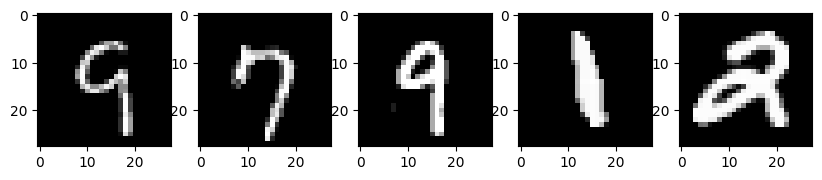

Corrupted Images


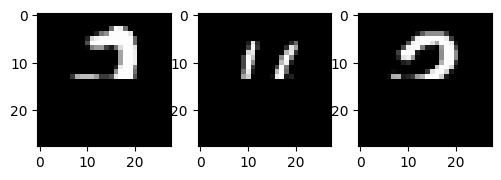

In [34]:
# @title Загрузка выборки из датасета (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }

import os
import torchvision.datasets as datasets
from random import sample

def show_images(images):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(10,10))
    plt.tight_layout()
    index = 1
    for x in images:
        image = x
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        index += 1

if not os.path.exists('/content/mnist.npz'):
    mnist_trainset = datasets.MNIST(root='/content/MNIST', train=True, download=True)
    train = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 5)]
    test = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 3)]
    np.savez('/content/mnist.npz', train=train, test=test)

data = np.load("/content/mnist.npz")
training_img = data["train"]
training_img = np.asarray(training_img)
corrupted_img = data["test"]
corrupted_img_true = data['test']
for i, item in enumerate(corrupted_img):
    corrupted_img[i][14:, :] = 0

print("Training Images")
show_images(training_img)
plt.show()

print("Corrupted Images")
show_images(corrupted_img)
plt.show()

Теперь у нас есть два набора:
- `training_img` — массив с изображениями, представленными в виде массивов $(28\times 28)$,
- `corrupted_img` — массив с бракованными изображениями, представленными в виде массивов $(28\times 28)$.

#### Обработка данных

Как мы выяснили ранее, для работы с изображениями нам необходимо их распрямить, то есть привести к вектору размера $(784 \times 1)$.

Запишите в переменные `training_img_flatten` и `corrupted_img_flatten` массивы распрямленных изображений соответствующих наборов `training_img` и  `corrupted_img`. Выведите получившиеся размеры массивов, используя [`numpy.shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

<sub>_Указание:_ воспользуйтесь функцией [`numpy.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)</sub>

In [36]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, corrupted_img_flatten.
'''

import numpy as np

# Assume training_img and corrupted_img are numpy arrays of shape (num_images, 28, 28)

# Flatten the training images
training_img_flatten = training_img.reshape(training_img.shape[0], -1)

# Flatten the corrupted images
corrupted_img_flatten = corrupted_img.reshape(corrupted_img.shape[0], -1)

# Print the shapes of the flattened arrays
print('Shape of training_img_flatten:', training_img_flatten.shape)
print('Shape of corrupted_img_flatten:', corrupted_img_flatten.shape)



Shape of training_img_flatten: (5, 784)
Shape of corrupted_img_flatten: (3, 784)


#### Обучение сети

Основываясь на наших предположениях из интуитивного понимания принципа работы, заполните матрицу $A$. В этом и заключается обучение нашей сети.

In [37]:
'''
Задайте матрицу весов A
'''

# Assuming training_img_flatten is already defined from the previous step

# Assign the weight matrix A using the flattened training images
A = training_img_flatten.copy()

# Print the shape of A to confirm
print('Shape of weight matrix A:', A.shape)



Shape of weight matrix A: (5, 784)


$\beta$ зададим равной $10^{-5}$. Вы можете поизменять этот гиперпараметр и написать в выводе, что меняется, или почитать в открытых источниках.

In [53]:
beta = 0.01

#### Применение обученной сети = решение дифференциального уравнения

Получается, что применение нашей сети сводится к решению задачи Коши с уравнением (1) и начальным условием, равным бракованной картинке, которую мы хотим восстановить. Понятно, что решать ее в явном виде не имеет смысла (по-крайней мере, потому что это система из 784 уравнений с функцией $\mathrm{softmax}$ внутри). Поэтому будем решать численно.

Воспользуйтесь функцией `Euler_method` из первого задания для решения заданной задачи Коши для каждой бракованной картинки с подставленными матрицей $A$ и скаляром $\beta$.

Получившиеся решения запишите в переменные `solution_i`, где $i$ — порядковый номер бракованной картинки (начинается с нуля).

In [54]:
# Предполагается, что следующие переменные уже определены:
# A: матрица весов
# beta: скалярный параметр
# corrupted_img_flatten: массив распрямленных бракованных изображений
# dynamics: функция динамики

num_corrupted = corrupted_img_flatten.shape[0]

# Список для хранения решений
solutions = []

for i in range(num_corrupted):
    x0 = corrupted_img_flatten[i]
    # Решаем задачу Коши
    t_values, x_values = Euler_method(dynamics, (0, 1.0), x0, 0.01, args={'A': A, 'beta': beta})
    # Извлекаем решение в конечный момент времени
    solution = x_values[-1]
    solutions.append(solution)
    # Также можно сохранить решение в переменную solution_i, если необходимо
    # globals()['solution_{}'.format(i)] = solution

# Преобразуем список решений в массив
solutions = np.array(solutions)


Выведите получившиеся восстановленные изображения бок о бок с исходными бракованными. Как Вы думаете, угадал ли компьютер с цифрой? Сделайте вывод почему.

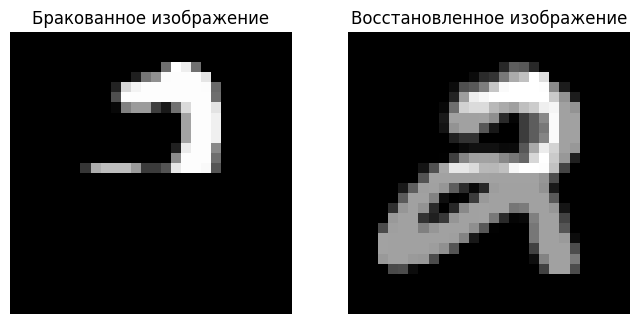

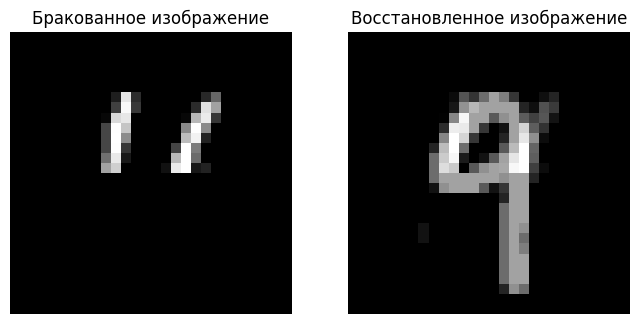

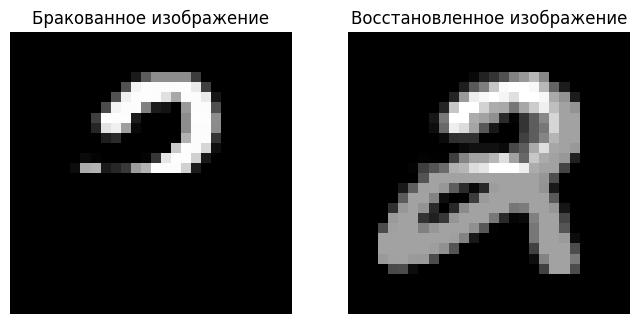

In [55]:
import matplotlib.pyplot as plt

# Количество изображений для отображения
num_display = min(5, len(solutions))

for i in range(num_display):
    # Бракованное изображение
    corrupted_image = corrupted_img_flatten[i].reshape(28, 28)
    # Восстановленное изображение
    restored_image = solutions[i].reshape(28, 28)

    # Создаем фигуру с двумя подграфиками
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    # Бракованное изображение
    axs[0].imshow(corrupted_image, cmap='gray')
    axs[0].set_title('Бракованное изображение')
    axs[0].axis('off')
    # Восстановленное изображение
    axs[1].imshow(restored_image, cmap='gray')
    axs[1].set_title('Восстановленное изображение')
    axs[1].axis('off')
    plt.show()



#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что плаки плаки. В целом, сеть демонстрирует потенциал, но качество восстановления сильно зависит от сложности дефектов и специфики обучающей выборки, возможно имеет смысл поменять метод решения коши, так как на глаз ошибки искать лень, спойлер это решение не увенчалось успехом, и да принцип DRY меня боится после этой лабы, спасибо за внимание*

---

In [56]:
import numpy as np

def dynamics(t, x, A, beta):
    """
    Вычисляет правую часть дифференциального уравнения для сети Хопфилда.

    Параметры:
    t (float): Время (не используется, но требуется для совместимости с solve_ivp).
    x (numpy.array): Текущее состояние системы.
    A (numpy.array): Матрица весов.
    beta (float): Параметр обратной температуры.

    Возвращает:
    numpy.array: Производная x.
    """
    Ax = np.dot(A, x)
    softmax_result = softmax(Ax, beta)
    x_prime = np.dot(A.T, softmax_result) - x
    return x_prime


In [57]:
from scipy.integrate import solve_ivp

# Предполагаем, что A, beta и corrupted_img_flatten уже определены

solutions = []
num_corrupted = corrupted_img_flatten.shape[0]

for i in range(num_corrupted):
    x0 = corrupted_img_flatten[i]
    # Решаем дифференциальное уравнение на интервале времени от 0 до 1.0
    sol = solve_ivp(
        fun=dynamics,
        t_span=(0, 5.0),
        y0=x0,
        args=(A, beta),
        method='RK45',
        vectorized=False,  # Указываем, что функция dynamics не векторизована по x
        rtol=1e-6,
        atol=1e-8
    )
    # Извлекаем решение в конечный момент времени
    solution = sol.y[:, -1]
    solutions.append(solution)
    # Также можно сохранить решение в переменную solution_i, если необходимо
    # globals()['solution_{}'.format(i)] = solution

# Преобразуем список решений в массив
solutions = np.array(solutions)


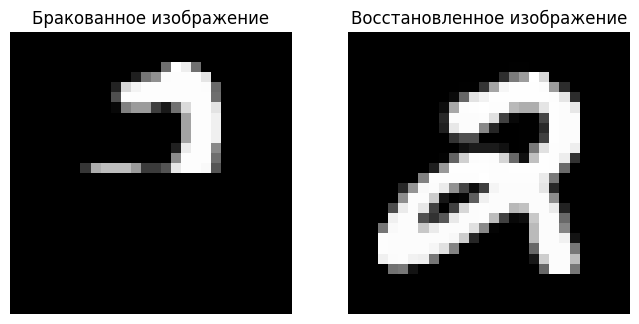

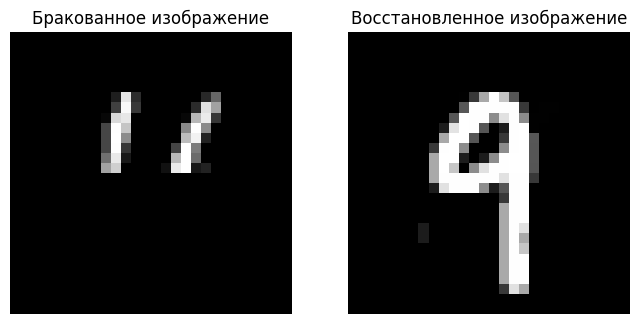

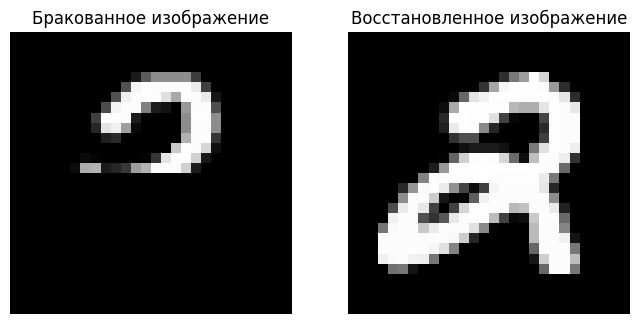

In [58]:
import matplotlib.pyplot as plt

# Количество изображений для отображения
num_display = min(5, num_corrupted)

for i in range(num_display):
    # Бракованное изображение
    corrupted_image = corrupted_img_flatten[i].reshape(28, 28)
    # Восстановленное изображение
    restored_image = solutions[i].reshape(28, 28)

    # Создаем фигуру с двумя подграфиками
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    # Бракованное изображение
    axs[0].imshow(corrupted_image, cmap='gray')
    axs[0].set_title('Бракованное изображение')
    axs[0].axis('off')
    # Восстановленное изображение
    axs[1].imshow(restored_image, cmap='gray')
    axs[1].set_title('Восстановленное изображение')
    axs[1].axis('off')
    plt.show()


Я сделал все что мог...
дело было не в высокой погрешности метода эйлера...

## Бонус! <sub>но все еще обязательный</sub>

> Я прекрасно знаю, как Вы все любите лабораторные работы с покемонами еще с первого курса.
>
> Поэтому предлагаю свою версию работы про покемонов.

### Описание задачи

Мне кажется, во всем, что связано с покемонами, есть эпизоды, когда по тени необходимо угадать имена покемонов. Именно это и предлагается сделать Вам в бонусном задании.

И, конечно, было бы интересно заставить это делать Вас самих, но лучше попросим об этом волшебную машину с нейронной сетью Хопфилда.

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Картинка тени покемона каждый раз выбирается случайным образом!<br>
    Если Вы хотите написать вывод по конкретному покемону,<br>то сохраните картинки тени и результата к себе на компьютер <br>и вставьте картинки в вывод.</center></p></td>
  </tr>
</table>

In [ ]:
# @title Загрузка покемонов (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }
import matplotlib.image as mpimg
from urllib.request import urlretrieve
from random import choice, sample

background = mpimg.imread(urlretrieve("https://d31xsmoz1lk3y3.cloudfront.net/big/1582671.jpg?v=1558141242", "bg.jpg")[0])

urls = [
    f'https://assets.pokemon.com/assets/cms2/img/pokedex/full/0{i}.png' for i in sample(range(10, 100), 5)
]

training_img = []
shadow_img = []
for url in urls:
    file_name, _ = urlretrieve(url, "test.png")
    img = mpimg.imread(file_name)
    xx = np.linspace(0, img.shape[0] - 1, 80).astype(int)
    yy = np.linspace(0, img.shape[1] - 1, 80).astype(int)
    resized_img = img[xx, :, :][:, yy, :]
    query_img = np.ones(resized_img.shape)
    query_img[:, :, 0] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 1] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 2] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 3] = resized_img[:, :, 3]
    training_img.append(resized_img)
    shadow_img.append(query_img)

training_img = np.asarray(training_img)
shadow_img = choice(shadow_img)
fig = plt.figure(frameon=False)
plt.imshow(shadow_img, origin='lower', extent=[200, 200+4*shadow_img.shape[0],50,50+4*shadow_img.shape[1]])
plt.imshow(background,alpha=0.7)
plt.axis('off')
plt.axis("tight")
plt.axis("image")
print('\033[1m' + 'Это что за покемон?' + '\033[0m')

Теперь в у нас есть:
- `training_img` — массив с цветными изображениями, представленными в виде массивов,
- `shadow_img` — тень какого-то покемона.

#### Обработка данных

Аналогично случаю с изображениями цифр распрямите изображения в массивы.

In [ ]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, shadow_img_flatten.
'''

### Место для Вашего решения ###


#### Обучение сети

Обучите сеть, задав матрицу $A$.

In [ ]:
'''
Задайте матрицу весов A
'''

### Место для Вашего решения ###


In [ ]:
beta = 1e-2

#### Применение обученной сети

Примените обученную сеть, чтобы определить* покемона по его тени.

На этот раз воспользуйтесь написанной в первом задании функцией `Runge_Kutta_method`.

&nbsp;
&nbsp;

_* Может так оказаться, что результат будет неузнаваем. Тогда Вам необходимо будет поизменять отрезок, на котором решается уравнение, или гиперпараметр `beta`. Обычно что-нибудь из этого способно помочь._

In [ ]:
'''
Запишите решения задач Коши в переменные solution
'''

### Место для Вашего решения ###


Выведите результат бок о бок с тенью.

In [ ]:
'''
Вывод изображений: тень | покемон
'''

### Место для Вашего решения ###


#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что ...*
---

#### Самая обязательная часть

Ну и, естественно, Вам необходимо узнать имя выпавшего покемона и его способности 😀

~~Ведь в этом суть лабораторных по программированию, разве нет?!~~

---
> ❗ **Место для имени и способностей покемона** ❗
>
> *Мне кажется, что это ...*
---